In [1]:
import pickle
import os
import pandas as pd
import seaborn as sns

In [31]:
results = []
for dock_id in os.listdir('gold_docking_postprocessing') :
    result_path = os.path.join('gold_docking_postprocessing', dock_id, 'results.p')
    if os.path.exists(result_path) :
        with open(result_path, 'rb') as f :
            result_d = pickle.load(f)
            results.append(result_d)

In [32]:
len(results)

712

In [26]:
rankers = ['score', 'model', 'energy']
df = pd.DataFrame()
for result in results :
    for ranker in rankers :
        result['ranking'][ranker]['ranker'] = ranker
        df = df.append(result['ranking'][ranker], ignore_index=True)

In [27]:
df.head()

,best_pose,docking_power,min_rmsd,min_rmsd_top_pose,ranker,top_score,top_score_pose
0,None,0.0,0.996249,6.648319,score,50.4844,None
1,None,1.0,0.996249,0.996249,model,49.5511,None
2,None,1.0,1.663002,1.663002,energy,45.4473,None
3,<rdkit.Chem.rdchem.Mol object at 0x7fa155e825b0>,1.0,0.270629,0.320170,score,109.5139,<rdkit.Chem.rdchem.Mol object at 0x7fa155e823b0>
4,<rdkit.Chem.rdchem.Mol object at 0x7fa155e827b0>,1.0,0.419183,0.433572,model,108.6882,<rdkit.Chem.rdchem.Mol object at 0x7fa155e82830>


<AxesSubplot:xlabel='ranker', ylabel='top_score'>

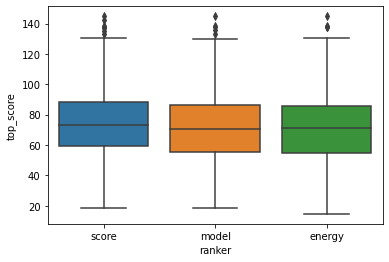

In [28]:
sns.boxplot(data=df, x='ranker', y='top_score')

<AxesSubplot:xlabel='ranker', ylabel='min_rmsd'>

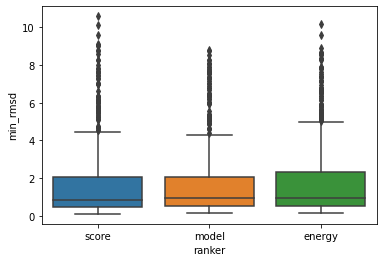

In [29]:
sns.boxplot(data=df, x='ranker', y='min_rmsd')

<AxesSubplot:xlabel='ranker', ylabel='docking_power'>

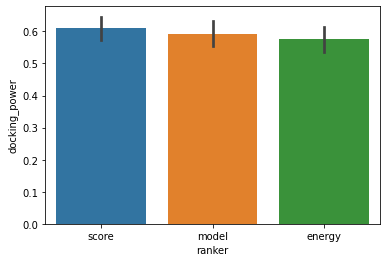

In [30]:
sns.barplot(data=df, x='ranker', y='docking_power')